In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [57]:
import tensorflow as tf
test_ds=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/cars-image-dataset/Cars Dataset/test',
    image_size=(224,224),
    batch_size=32
)

Found 813 files belonging to 7 classes.


In [58]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/cars-image-dataset/Cars Dataset/train',
    image_size=(224,224),
    batch_size=32
)

Found 3352 files belonging to 7 classes.


In [59]:
num_classes = 7

In [60]:
from tensorflow.keras import models,layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),   # random flips                    # random rotation
    layers.RandomZoom(0.2),                         # random zoom
                     # adjust contrast
])

In [61]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [62]:
train_ds=train_ds.map(lambda x,y:(preprocess_input(x),y))

In [63]:
test_ds=test_ds.map(lambda x,y:(preprocess_input(x),y))

In [64]:
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
base_model = VGG16(
    include_top=False, 
    weights="imagenet", 
    input_shape=(224, 224, 3),

)

In [65]:
base_model.trainable = False

In [66]:
model = models.Sequential([
    data_augmentation,
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),      # <-- BatchNorm after Dense
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # num_classes = your dataset classes
])

In [67]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [68]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',   # metric to monitor
    patience=3,           # how many epochs to wait after no improvement
    restore_best_weights=True # roll back to best weights
)

In [69]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=50,
    callbacks=[early_stopping],
        batch_size=32
)

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.4500 - loss: 1.8445 - val_accuracy: 0.7946 - val_loss: 0.6083
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.7926 - loss: 0.6780 - val_accuracy: 0.8721 - val_loss: 0.4082
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.8597 - loss: 0.4439 - val_accuracy: 0.8696 - val_loss: 0.4081
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9014 - loss: 0.3217 - val_accuracy: 0.8868 - val_loss: 0.3464
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.9192 - loss: 0.2599 - val_accuracy: 0.8819 - val_loss: 0.3817
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9246 - loss: 0.2281 - val_accuracy: 0.8893 - val_loss: 0.3428
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9463 - loss: 0.1722 - val_accuracy: 0.9065 - val_loss: 0.2986
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.9574 - loss: 0.1578 - val_acc

In [70]:
loss,acc=model.evaluate(test_ds)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9147 - loss: 0.2591


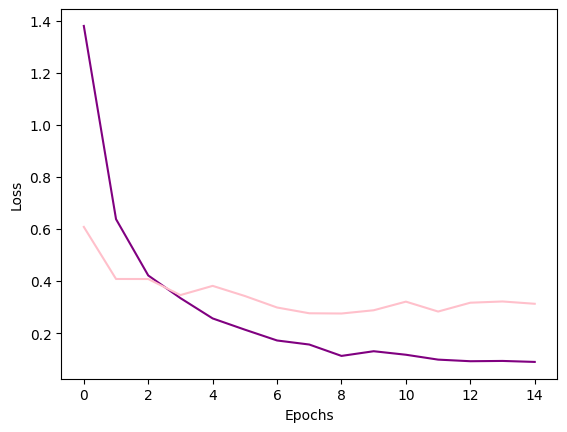

In [80]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label="Training Loss",color="purple")
plt.plot(history.history['val_loss'],label="Val Loss",color="red")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()